In [3]:
import os
import pandas as pd
#import seaborn as sns
import numpy as np
import torch
import torchtext
from torchtext.datasets import text_classification

import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

## Download data from Pytorch

In [4]:
# check directory for data if it doesnt already exist
if not os.path.isdir('./.data'):
    os.mkdir('./.data')
    
#Get train and text dataset to tensor
train_dataset, test_dataset = text_classification.DATASETS['YelpReviewFull'](
    root='./.data', ngrams=2, vocab=None)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

650000lines [02:44, 3945.31lines/s]
650000lines [04:34, 2367.95lines/s]
50000lines [00:20, 2450.80lines/s]


In [5]:
#File path to the csv file
csv_file = "./.data/yelp_review_full_csv/train.csv"

# Read csv file into dataframe
df = pd.read_csv(csv_file, names=["label", "review"])

# Print first 5 rows in the dataframe
df.head()

,label,review
0,5,dr. goldberg offers everything i look for in a...
1,2,"Unfortunately, the frustration of being Dr. Go..."
2,4,Been going to Dr. Goldberg for over 10 years. ...
3,4,Got a letter in the mail last week that said D...
4,1,I don't know what Dr. Goldberg was like before...


In [6]:
df['label'].value_counts()

5    130000
4    130000
3    130000
2    130000
1    130000
Name: label, dtype: int64

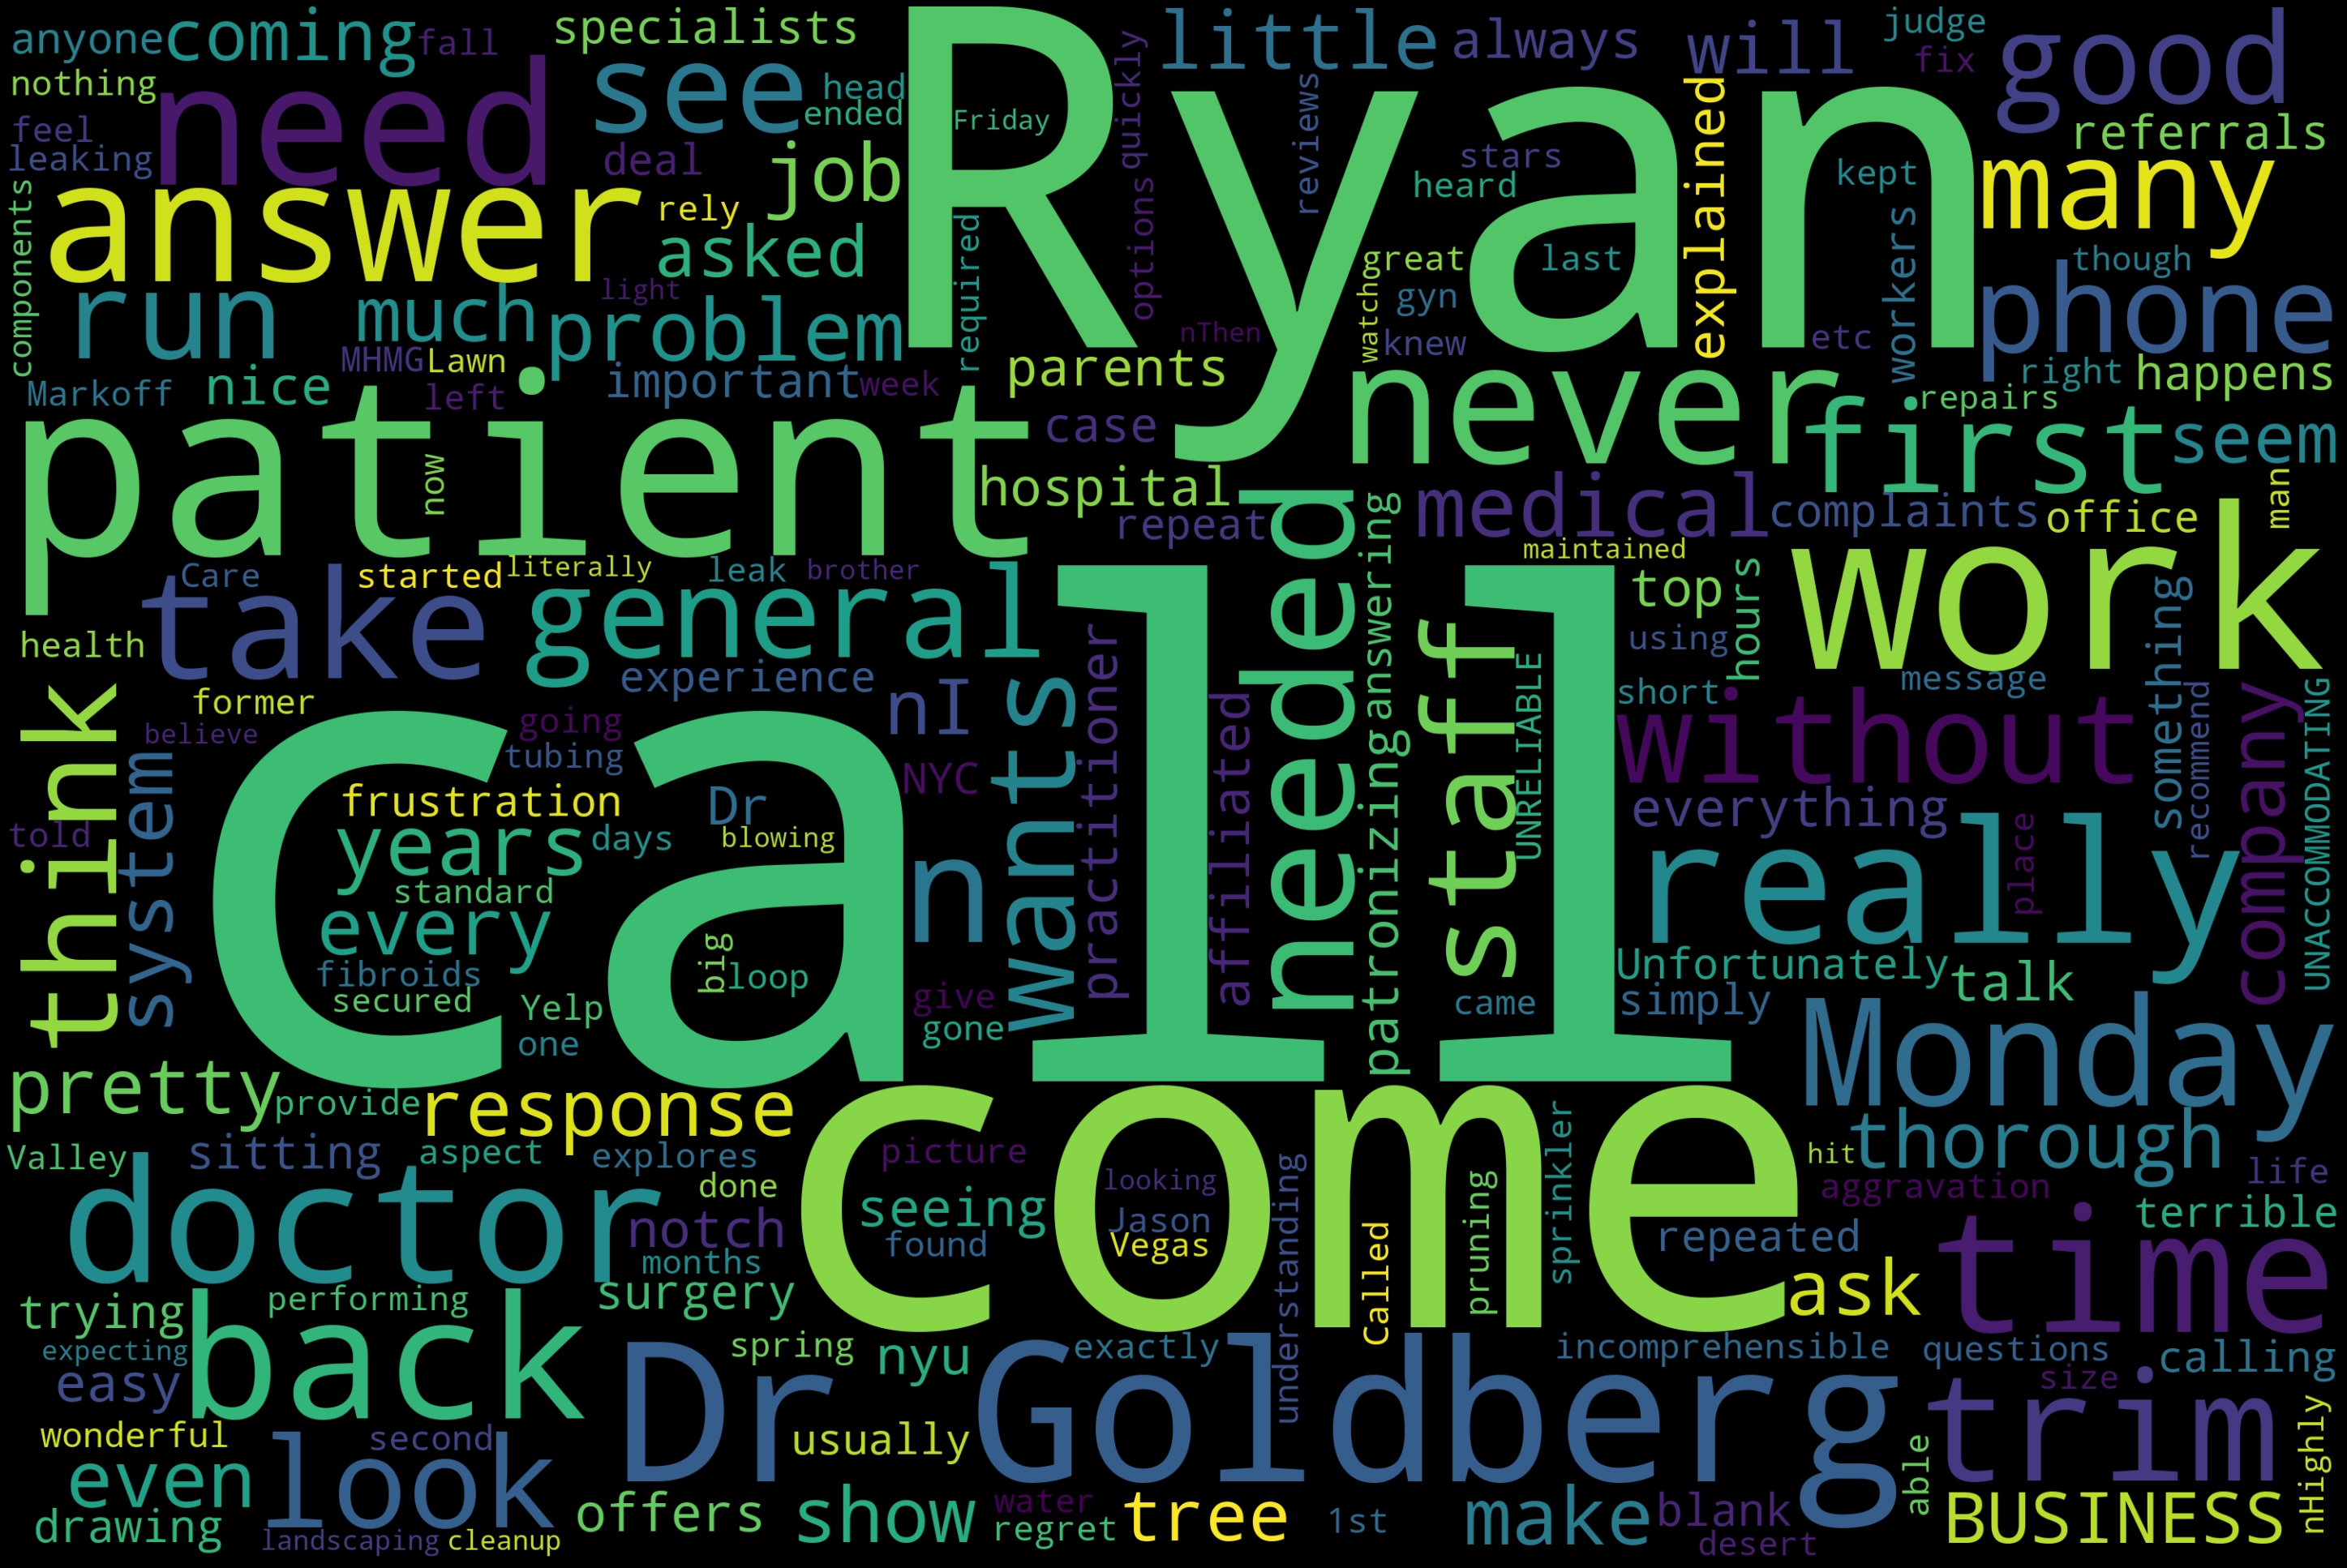

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Split Data to Test and Train

In [12]:
X,y = df.review, df.label

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Visualize how text turns into numbers ([word embedding](https://en.wikipedia.org/wiki/Word_embedding))

In [45]:
def get_vector_feature_matrix():
    vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features=5000)
    vector = vectorizer.fit_transform(np.array(df.review))
    return vector, vectorizer

In [46]:
vector, vectorizer = get_vector_feature_matrix()

In [49]:
df['review'].iloc[40]

'I always love a good diner.  Gab and Eat was just what we were looking for on a Saturday morning.  Good food.  Great people. Pittsburgh ambiance. \\n\\nThis place is obviously a beloved neighborhood gem.  I had french toast and bacon.  The french toast was made with the best Italian bread.  My fiance had what they called a \'mixed grill.\\"  It consisted of eggs, peppers, onions and home made sausage.  Not something you would eat everyday, but he loved it!   They also had great coffee.  They actually ground up the beans in front of us.  Now that\'s fresh.\\n\\nWe want to return sometime for \\"turkey day.\\"  Apparently they made fresh turkey every Tuesday.  Now that sounds good!\\n\\nCan\'t wait to return.'

## Create and Test Model

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words="english",ngram_range=(1, 2), max_features=50000)),
    ('clf', LogisticRegression(multi_class='ovr',max_iter=1000)),
])

pipeline.fit(X_train, y_train)

In [ ]:
accuracy = pipeline.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

In [ ]:
x_text = ["I hate tacos."]

In [ ]:
#x_text = ["As sports teams make visible their support for Black Lives Matter, NPRs Scott Simon reflects on the tradition of athletes speaking out on behalf of civil rights and social justice."]

In [37]:
x = np.array(x_text)
proba = pipeline.predict_proba(x_text)
classes = pipeline.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

In [38]:
result =pipeline.predict(x)[0]

print(f"Predicted: {result}")

Predicted: 1


In [39]:
resultdf

,1,2,3,4,5
0,0.251186,0.19493,0.18509,0.193293,0.175502
